In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import math
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Dense, BatchNormalization, Flatten
from keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1) b)

In [3]:

# Set the paths to the dataset and the three splits
dataset_path = "Data/images"
train_path = "main_db/training_data"
valid_path = "main_db/validation_data"
test_path = "main_db/testing_data"

# Set the split ratio for the train, valid and test datasets
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Get the list of all image files in the dataset

for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  if os.path.isdir(folder_path):
    image_files = []
    train_files = []
    valid_files = []
    test_files = []
    files = os.listdir(folder_path)
    image_files.extend([os.path.join(folder, file) for file in files])
    
    print(folder,"----",len(image_files),"images")

    # Shuffle the list of image files
    random.shuffle(image_files)

    # Calculate the number of images in each split
    num_train = math.ceil(len(image_files) * train_ratio)
    num_valid = math.ceil(len(image_files) * valid_ratio)
    num_test = math.ceil(len(image_files) * test_ratio)
    print("Train Split:",num_train, "Valid Split:",num_valid,"Test Split:",num_test)

    # Split the list of image files into the three splits
    train_files = image_files[:num_train]
    valid_files = image_files[num_train:num_train+num_valid]
    test_files = image_files[num_train+num_valid:]


    # Copy the images in each split to their corresponding directories
    train_path_folder = os.path.join(train_path, folder)
    valid_path_folder = os.path.join(valid_path, folder)
    test_path_folder = os.path.join(test_path, folder)

    if not os.path.exists(train_path_folder):
      os.makedirs(train_path_folder)
    if not os.path.exists(valid_path_folder):
      os.makedirs(valid_path_folder)
    if not os.path.exists(test_path_folder):
      os.makedirs(test_path_folder)


    for file in train_files:
      src = os.path.join(dataset_path, file)
      dst = os.path.join(train_path, file)
      shutil.copy(src, dst)
      # print("train", src,dst)

    for file in valid_files:
      src = os.path.join(dataset_path, file)
      dst = os.path.join(valid_path, file)
      shutil.copy(src, dst)
      # print("valid",src,dst)

    for file in test_files:
      src = os.path.join(dataset_path, file)
      dst = os.path.join(test_path, file)
      shutil.copy(src, dst)
      # print("test",src,dst)
    

005.Crested_Auklet ---- 44 images
Train Split: 31 Valid Split: 7 Test Split: 7
013.Bobolink ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
015.Lazuli_Bunting ---- 58 images
Train Split: 41 Valid Split: 9 Test Split: 9
023.Brandt_Cormorant ---- 59 images
Train Split: 42 Valid Split: 9 Test Split: 9
040.Olive_sided_Flycatcher ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
041.Scissor_tailed_Flycatcher ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
067.Anna_Hummingbird ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
072.Pomarine_Jaeger ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
076.Dark_eyed_Junco ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
081.Pied_Kingfisher ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
082.Ringed_Kingfisher ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
086.Pacific_Loon ---- 60 images
Train Split: 42 Valid Split: 9 Test Split: 9
099.Ovenbird ---- 60 images
Tra

In [4]:
print("==========Train Data==========")
dataset_path = "main_db/training_data"
for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  image_files = []
  if os.path.isdir(folder_path):
    files = os.listdir(folder_path)
    image_files.extend([os.path.join(folder, file) for file in files])
    
    print(folder,"----",len(image_files),"images")

print("==========Validation Data==========")
dataset_path = "main_db/validation_data"
for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  image_files = []
  if os.path.isdir(folder_path):
    files = os.listdir(folder_path)
    image_files.extend([os.path.join(folder, file) for file in files])
    
    print(folder,"----",len(image_files),"images")


print("==========Testing Data==========")
dataset_path = "main_db/testing_data"
for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  image_files = []
  if os.path.isdir(folder_path):
    files = os.listdir(folder_path)
    image_files.extend([os.path.join(folder, file) for file in files])
    
    print(folder,"----",len(image_files),"images")


==========Train Data==========
005.Crested_Auklet ---- 31 images
013.Bobolink ---- 42 images
015.Lazuli_Bunting ---- 41 images
023.Brandt_Cormorant ---- 42 images
040.Olive_sided_Flycatcher ---- 42 images
041.Scissor_tailed_Flycatcher ---- 42 images
067.Anna_Hummingbird ---- 42 images
072.Pomarine_Jaeger ---- 42 images
076.Dark_eyed_Junco ---- 42 images
081.Pied_Kingfisher ---- 42 images
082.Ringed_Kingfisher ---- 42 images
086.Pacific_Loon ---- 42 images
099.Ovenbird ---- 42 images
104.American_Pipit ---- 42 images
127.Savannah_Sparrow ---- 42 images
135.Bank_Swallow ---- 42 images
141.Artic_Tern ---- 41 images
149.Brown_Thrasher ---- 42 images
156.White_eyed_Vireo ---- 42 images
168.Kentucky_Warbler ---- 42 images
==========Validation Data==========
005.Crested_Auklet ---- 7 images
013.Bobolink ---- 9 images
015.Lazuli_Bunting ---- 9 images
023.Brandt_Cormorant ---- 9 images
040.Olive_sided_Flycatcher ---- 9 images
041.Scissor_tailed_Flycatcher ---- 9 images
067.Anna_Hummingbird ----

## VGG16

## 1 c) ii)

In [5]:
# Reading Custom Dataset and Image Augmentation

img_size = (256,256)

train_datagen = ImageDataGenerator(zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip=True, 
                                   rotation_range=10, 
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   brightness_range = [0.2,0.4],
                                   fill_mode="nearest",
                                   preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('main_db/training_data',
                                                    target_size=img_size,
                                                    class_mode='categorical')


valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_generator = valid_datagen.flow_from_directory('main_db/validation_data',
                                                    target_size=img_size,
                                                    class_mode='categorical',
                                                    shuffle= True)


test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory('main_db/testing_data',
                                                    target_size=img_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 827 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 171 images belonging to 20 classes.


## 1 c) iii)

In [6]:
# from tensorflow.keras.layers import RandomCrop

# Creating Model Architecture

img_size = (256,256,3)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=img_size)
base_model.trainable = False 

vgg_model = Sequential()
# vgg_model.add(RandomCrop(224,224))    give lower accuracy
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(256, activation = 'relu'))     #256 best accuracy
vgg_model.add(BatchNormalization())
vgg_model.add(Dense(20, activation = 'softmax'))
vgg_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [7]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                        

In [8]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,
                               patience=10, 
                               verbose = 1)

model_checkpoint = ModelCheckpoint(filepath='vgg_model.h5',
                                   save_best_only=True,
                                   monitor='val_loss')

In [9]:
# Hyperparmeters

N_EPOCHS = 100
BATCH_SIZE = 5

## 1 c) iv)

In [10]:
vgg_history = vgg_model.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=N_EPOCHS,
                            validation_data=valid_generator,
                            callbacks=[early_stopping, model_checkpoint],
                            verbose = 1)

Epoch 1/100
26/26 [==============================] - 28s 818ms/step - loss: 3.0904 - accuracy: 0.2273 - val_loss: 5.5971 - val_accuracy: 0.4719
Epoch 2/100
26/26 [==============================] - 13s 482ms/step - loss: 1.8138 - accuracy: 0.4728 - val_loss: 3.1972 - val_accuracy: 0.5337
Epoch 3/100
26/26 [==============================] - 13s 501ms/step - loss: 1.3989 - accuracy: 0.5877 - val_loss: 1.8407 - val_accuracy: 0.6742
Epoch 4/100
26/26 [==============================] - 13s 500ms/step - loss: 1.1880 - accuracy: 0.6360 - val_loss: 1.4913 - val_accuracy: 0.7135
Epoch 5/100
26/26 [==============================] - 14s 535ms/step - loss: 1.0021 - accuracy: 0.6892 - val_loss: 1.6371 - val_accuracy: 0.7303
Epoch 6/100
26/26 [==============================] - 13s 506ms/step - loss: 0.9570 - accuracy: 0.6844 - val_loss: 1.4579 - val_accuracy: 0.7472
Epoch 7/100
26/26 [==============================] - 13s 504ms/step - loss: 0.8950 - accuracy: 0.7364 - val_loss: 1.2684 - val_accuracy:

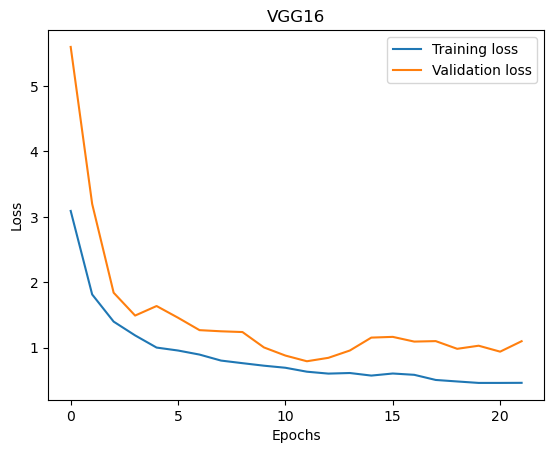

In [29]:
train_loss = vgg_history.history['loss']
valid_loss = vgg_history.history['val_loss']


# Plot the training and validation errors vs. epochs
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("VGG16")
plt.show()

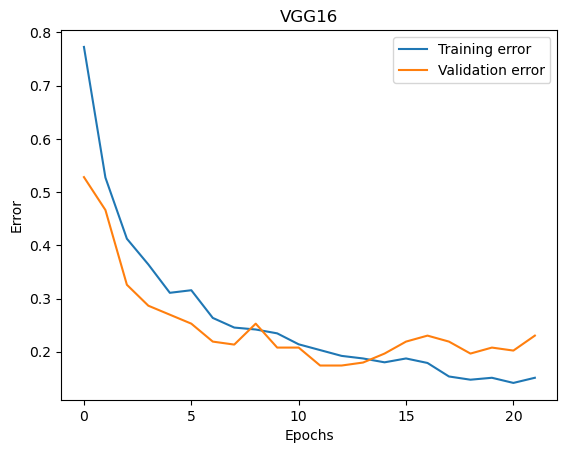

In [34]:
train_error = [1-acc for acc in vgg_history.history['accuracy']]
valid_error = [1-val_acc for val_acc in vgg_history.history['val_accuracy']]


# Plot the training and validation errors vs. epochs
plt.plot(train_error, label='Training error')
plt.plot(valid_error, label='Validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.title("VGG16")
plt.show()

In [12]:
# Loading weights from lowest validation error 

vgg_model.load_weights('vgg_model.h5') 

preds = vgg_model.predict(test_generator)

6/6 [==============================] - 3s 498ms/step


In [13]:
# Predicting values of Test Data

preds_class = preds.argmax(axis=-1)
true_class = test_generator.classes

# Convert Predicted Labels to Class Names

# idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
# preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
# filenames_to_cls = list(zip(test_generator.filenames, preds_cls))

## 1) c) v)

In [14]:
# Generating Precision, Recall, F1 and Accuracy score

report = classification_report(true_class, preds_class)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.78      0.88         9
           2       1.00      0.88      0.93         8
           3       1.00      0.62      0.77         8
           4       0.86      0.67      0.75         9
           5       0.88      0.78      0.82         9
           6       1.00      0.89      0.94         9
           7       0.80      0.89      0.84         9
           8       0.73      0.89      0.80         9
           9       1.00      1.00      1.00         9
          10       0.89      0.89      0.89         9
          11       0.82      1.00      0.90         9
          12       1.00      0.56      0.71         9
          13       0.78      0.78      0.78         9
          14       0.75      0.67      0.71         9
          15       0.78      0.88      0.82         8
          16       1.00      1.00      1.00         8
          17       0.78    

## EfficientNetB0

## 1 c) ii)

In [15]:
# Reading Custom Dataset and Image Augmentation


img_size = (256,256)

train_datagen = ImageDataGenerator(zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip=True, 
                                   rotation_range=10, 
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   brightness_range = [0.2,0.4],
                                   fill_mode="nearest")

train_generator = train_datagen.flow_from_directory('main_db/training_data',
                                                    target_size=img_size,
                                                    class_mode='categorical')


valid_datagen = ImageDataGenerator()

valid_generator = valid_datagen.flow_from_directory('main_db/validation_data',
                                                    target_size=img_size,
                                                    class_mode='categorical',
                                                    shuffle=False)


test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory('main_db/testing_data',
                                                    target_size=img_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 827 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 171 images belonging to 20 classes.


## 1 c) iii)

In [16]:
# Creating Model Architecture

img_size = (256,256,3)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=img_size)
base_model.trainable = False 

effb0_model = Sequential()
effb0_model.add(base_model)
effb0_model.add(Flatten())
effb0_model.add(Dropout(0.2))
effb0_model.add(Dense(512, activation = 'relu'))     #246 best acc
effb0_model.add(BatchNormalization())
effb0_model.add(Dense(20, activation = 'softmax'))
effb0_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
effb0_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 flatten_1 (Flatten)         (None, 81920)             0         
                                                                 
 dropout_1 (Dropout)         (None, 81920)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               41943552  
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                      

In [18]:
model_checkpoint = ModelCheckpoint(filepath='effb0_model.h5',
                                   save_best_only=True,
                                   monitor='val_loss')

## 1 c) iv)

In [19]:
effb0_history = effb0_model.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=N_EPOCHS,
                            validation_data=valid_generator,
                            callbacks=[early_stopping, model_checkpoint],
                            verbose = 1)

Epoch 1/100
26/26 [==============================] - 20s 579ms/step - loss: 3.6839 - accuracy: 0.2479 - val_loss: 3.6995 - val_accuracy: 0.4045
Epoch 2/100
26/26 [==============================] - 13s 484ms/step - loss: 1.7893 - accuracy: 0.4752 - val_loss: 1.1023 - val_accuracy: 0.7416
Epoch 3/100
26/26 [==============================] - 12s 477ms/step - loss: 1.3563 - accuracy: 0.6034 - val_loss: 0.8503 - val_accuracy: 0.7921
Epoch 4/100
26/26 [==============================] - 11s 438ms/step - loss: 1.2168 - accuracy: 0.6409 - val_loss: 0.7998 - val_accuracy: 0.7753
Epoch 5/100
26/26 [==============================] - 11s 431ms/step - loss: 0.9167 - accuracy: 0.6880 - val_loss: 0.6044 - val_accuracy: 0.8371
Epoch 6/100
26/26 [==============================] - 10s 400ms/step - loss: 0.8817 - accuracy: 0.7352 - val_loss: 0.6464 - val_accuracy: 0.8034
Epoch 7/100
26/26 [==============================] - 14s 524ms/step - loss: 0.8638 - accuracy: 0.7316 - val_loss: 0.5506 - val_accuracy:

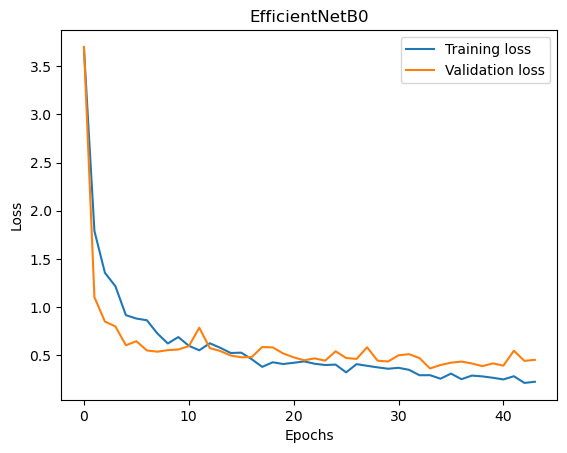

In [37]:
train_loss = effb0_history.history['loss']
valid_loss = effb0_history.history['val_loss']

# Plot the training and validation errors vs. epochs
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("EfficientNetB0")
plt.show()

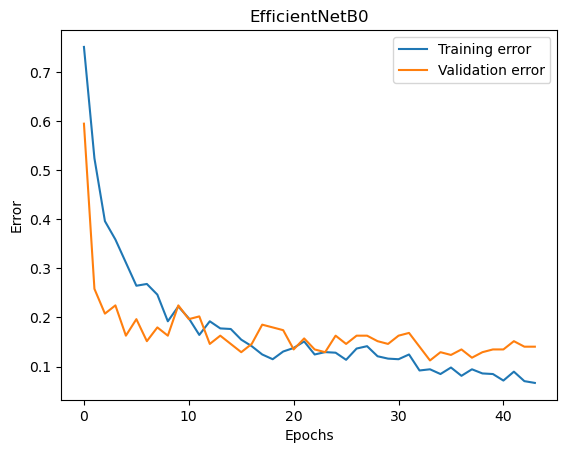

In [35]:
train_errors = [1-acc for acc in effb0_history.history['accuracy']]
valid_errors = [1-val_acc for val_acc in effb0_history.history['val_accuracy']]

# Plot the training and validation errors vs. epochs
plt.plot(train_errors, label='Training error')
plt.plot(valid_errors, label='Validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.title("EfficientNetB0")
plt.show()

In [21]:
# Loading weights from lowest validation error 


effb0_model.load_weights('effb0_model.h5') 

preds = effb0_model.predict(test_generator)

6/6 [==============================] - 2s 224ms/step


In [22]:
# Predicting values of Test Data

preds_class = preds.argmax(axis=-1)
true_class = test_generator.classes

## 1) c) v)

In [23]:
# Generating Precision, Recall, F1 and Accuracy score

report = classification_report(true_class, preds_class)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         8
           3       1.00      0.62      0.77         8
           4       0.83      0.56      0.67         9
           5       1.00      0.89      0.94         9
           6       0.90      1.00      0.95         9
           7       0.75      1.00      0.86         9
           8       0.82      1.00      0.90         9
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       0.90      1.00      0.95         9
          12       0.88      0.78      0.82         9
          13       0.89      0.89      0.89         9
          14       0.90      1.00      0.95         9
          15       0.62      0.62      0.62         8
          16       1.00      1.00      1.00         8
          17       1.00    

## Refrences

https://www.tensorflow.org/install/pip  
https://stackoverflow.com/questions/57394135/split-image-dataset-into-train-test-datasets  
https://www.geeksforgeeks.org/multiclass-image-classification-using-transfer-learning/  
https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/  
https://stackoverflow.com/questions/56913840/how-do-i-fetch-the-names-of-the-classes-scanned-by-flow-from-directory-function  
https://gist.github.com/rstml/bbd491287efc24133b90d4f7f3663905 
https://keras.io/api/callbacks/early_stopping/  
https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/  
https://datascience.stackexchange.com/questions/73576/how-to-correctly-output-precision-recall-and-f1score-in-keras  
https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html  